In [1]:
#Librerias
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, BatchNormalization, Activation, MaxPooling2D, ZeroPadding2D
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
import numpy as np
import os
import cv2
from skimage import io, color
from skimage.color import rgb2gray
import math
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
from tensorflow.keras.models import load_model
from PIL import Image, ImageFilter
from tensorflow.keras.callbacks import  ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
ubicacion= '/content/drive/MyDrive/Colab Notebooks/Procesamiento_y_Clasificacion_de_Datos/Tarea_6/hand_sing_dataset/Train/A'
contenido1 = os.listdir(ubicacion)
len(contenido1)

1126

In [4]:
file_path2= ubicacion + "/" + contenido1[0]
img_gs = cv2.imread(file_path2)

In [5]:
contenido1[1]

'12610_A.jpg'

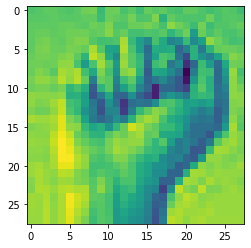

In [6]:
with Image.open(file_path2) as img:
    img.load()

type(img)
    
isinstance(img, Image.Image)

img= np.array(img)
imgplot = plt.imshow(img)
plt.show()

In [7]:
# imgplot = plt.imshow(edge_enhance)
# plt.show()

In [8]:
def preproceso(ubicacion):
    imagenes=[]
    letra= []
    contenido1 = os.listdir(ubicacion)
    for i in range(len(contenido1)):
        file_path1= ubicacion + "/" + contenido1[i]
        contenido2 = os.listdir(file_path1)
        for j in range(len(contenido2)):
            file_path2= file_path1 + "/" + contenido2[j]
            with Image.open(file_path2) as img:
                img.load()
            type(img)
            isinstance(img, Image.Image)
            img_gray = img.convert("L")
            edges = img_gray.filter(ImageFilter.FIND_EDGES)
            sharp_img = img_gray.filter(ImageFilter.SHARPEN)
            img_gray_smooth = sharp_img.filter(ImageFilter.SMOOTH)
            edge_enhance = img_gray_smooth.filter(ImageFilter.EDGE_ENHANCE)
            img_gs= np.array(edge_enhance)
            imagenes.append(img_gs)
            letra.append(contenido1[i])
    return imagenes, letra

In [9]:
ubicacion1= '/content/drive/MyDrive/Colab Notebooks/Procesamiento_y_Clasificacion_de_Datos/Tarea_6/hand_sing_dataset/Train'
ubicacion2= '/content/drive/MyDrive/Colab Notebooks/Procesamiento_y_Clasificacion_de_Datos/Tarea_6/hand_sing_dataset/Test'

Datos= preproceso(ubicacion1)
DatosT= preproceso(ubicacion2)

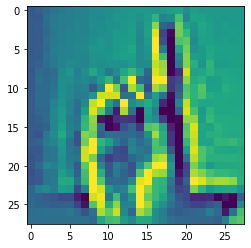

In [10]:
imgplot = plt.imshow(Datos[0][0])
plt.show()

In [11]:
Datos[1][3000]

'C'

In [12]:
#Datos de entreamiento
x= np.array(Datos[0])
Yy_train= Datos[1]
y=[]
for i in range(len(Yy_train)):
    if Yy_train[i]=='A':
        y.append([0])
    elif Yy_train[i]=='B':
        y.append([1])
    elif Yy_train[i]=='C':
        y.append([2])
    elif Yy_train[i]=='D':
        y.append([3])
    elif Yy_train[i]=='E':
        y.append([4])
    elif Yy_train[i]=='F':
        y.append([5])
    elif Yy_train[i]=='G':
        y.append([6])
    elif Yy_train[i]=='H':
        y.append([7])
    elif Yy_train[i]=='I':
        y.append([8])
    elif Yy_train[i]=='K':
        y.append([9])
    elif Yy_train[i]=='L':
        y.append([10])
    elif Yy_train[i]=='M':
        y.append([11])
    elif Yy_train[i]=='N':
        y.append([12])
    elif Yy_train[i]=='O':
        y.append([13])
    elif Yy_train[i]=='P':
        y.append([14])
    elif Yy_train[i]=='Q':
        y.append([15])
    elif Yy_train[i]=='R':
        y.append([16])
    elif Yy_train[i]=='S':
        y.append([17])
    elif Yy_train[i]=='T':
        y.append([18])
    elif Yy_train[i]=='U':
        y.append([19])
    elif Yy_train[i]=='V':
        y.append([20])
    elif Yy_train[i]=='W':
        y.append([21])
    elif Yy_train[i]=='X':
        y.append([22])
    else:
        y.append([23])

y_train= y

In [13]:
#Datos de testeo
x_test= np.array(DatosT[0])
Yy_train= DatosT[1]
y=[]
for i in range(len(Yy_train)):
    if Yy_train[i]=='A':
        y.append([0])
    elif Yy_train[i]=='B':
        y.append([1])
    elif Yy_train[i]=='C':
        y.append([2])
    elif Yy_train[i]=='D':
        y.append([3])
    elif Yy_train[i]=='E':
        y.append([4])
    elif Yy_train[i]=='F':
        y.append([5])
    elif Yy_train[i]=='G':
        y.append([6])
    elif Yy_train[i]=='H':
        y.append([7])
    elif Yy_train[i]=='I':
        y.append([8])
    elif Yy_train[i]=='K':
        y.append([9])
    elif Yy_train[i]=='L':
        y.append([10])
    elif Yy_train[i]=='M':
        y.append([11])
    elif Yy_train[i]=='N':
        y.append([12])
    elif Yy_train[i]=='O':
        y.append([13])
    elif Yy_train[i]=='P':
        y.append([14])
    elif Yy_train[i]=='Q':
        y.append([15])
    elif Yy_train[i]=='R':
        y.append([16])
    elif Yy_train[i]=='S':
        y.append([17])
    elif Yy_train[i]=='T':
        y.append([18])
    elif Yy_train[i]=='U':
        y.append([19])
    elif Yy_train[i]=='V':
        y.append([20])
    elif Yy_train[i]=='W':
        y.append([21])
    elif Yy_train[i]=='X':
        y.append([22])
    else:
        y.append([23])

y_test = y

In [14]:
x.shape

(19123, 28, 28)

In [15]:
#Cuando se trabaja en blanco y negro
# Flattening the images from the 28x28x1 pixels to 1D 784 pixels
X_train = x.reshape(x.shape[0], 784)
X_test = x_test.reshape(x_test.shape[0], 784)
X_train = x.astype('float32')
X_test = x_test.astype('float32')
# normalizing the data to help with the training
X_train /= 255
X_test /= 255

In [16]:
X_test.shape

(7172, 28, 28)

[7]


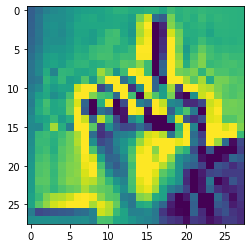

In [17]:
xs= 1
print(y[xs])
imgplot = plt.imshow(X_train[xs])
plt.show()

In [18]:
# one-hot encoding using keras' numpy-related utilities
y_train= np.array(y_train)
y_test= np.array(y_test)
n_classes = 24
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (19123, 1)
Shape after one-hot encoding:  (19123, 24)


In [19]:
Y_test.shape

(7172, 24)

In [ ]:
#Iniciamos el modelo

In [ ]:
# Configuración Tensorboard
from tensorflow.keras.callbacks import TensorBoard
import datetime, os

%load_ext tensorboard

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard(logdir, histogram_freq=1)

In [ ]:
#Start model Alexnet
model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(28, 28,1),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 2
model.add(Conv2D(36, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 3
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 5
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 6
model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

#flatten output of conv
model.add(Flatten())

model.add(Dense(24))
model.add(Activation('softmax'))

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer= "adam", metrics=["acc"])
early_stop= EarlyStopping(monitor= "val_loss", patience= 4, restore_best_weights= True)
# training the model for 10 epochs
cnn= model.fit(X_train, Y_train, batch_size=200, epochs=10, validation_data=(X_test, Y_test),callbacks=[early_stop])

Epoch 1/10
138/138 [==============================] - 70s 486ms/step - loss: 0.5837 - acc: 0.8487 - val_loss: 3.7592 - val_acc: 0.0721
Epoch 2/10
138/138 [==============================] - 73s 527ms/step - loss: 0.0274 - acc: 0.9987 - val_loss: 2.3815 - val_acc: 0.2817
Epoch 3/10
138/138 [==============================] - 77s 557ms/step - loss: 0.0089 - acc: 0.9999 - val_loss: 0.3367 - val_acc: 0.9120
Epoch 4/10
138/138 [==============================] - 78s 568ms/step - loss: 0.0048 - acc: 0.9999 - val_loss: 0.1488 - val_acc: 0.9584
Epoch 5/10
138/138 [==============================] - 78s 567ms/step - loss: 0.0030 - acc: 1.0000 - val_loss: 0.1231 - val_acc: 0.9643
Epoch 6/10
138/138 [==============================] - 80s 580ms/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.1330 - val_acc: 0.9601
Epoch 7/10
138/138 [==============================] - 82s 593ms/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.1297 - val_acc: 0.9668
Epoch 8/10
138/138 [==============================] - 8

Text(0.5, 1.0, 'Comportamiento de la perdida')

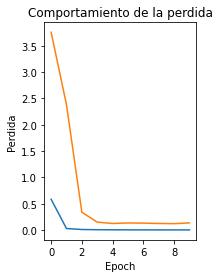

In [ ]:
plt.subplot(1,2,1)
plt.plot(cnn.history['loss'])
plt.plot(cnn.history['val_loss'])
plt.ylabel("Perdida")
plt.xlabel("Epoch")
plt.title("Comportamiento de la perdida")

Text(0.5, 1.0, 'Comportamiento de la precisión')

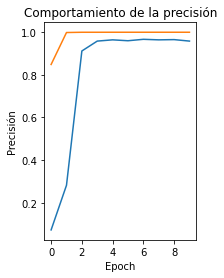

In [ ]:
plt.subplot(1,2,1)
plt.plot(cnn.history['val_acc'])
plt.plot(cnn.history['acc'])
plt.ylabel("Precisión")
plt.xlabel("Epoch")
plt.title("Comportamiento de la precisión")

Matriz de confusion:


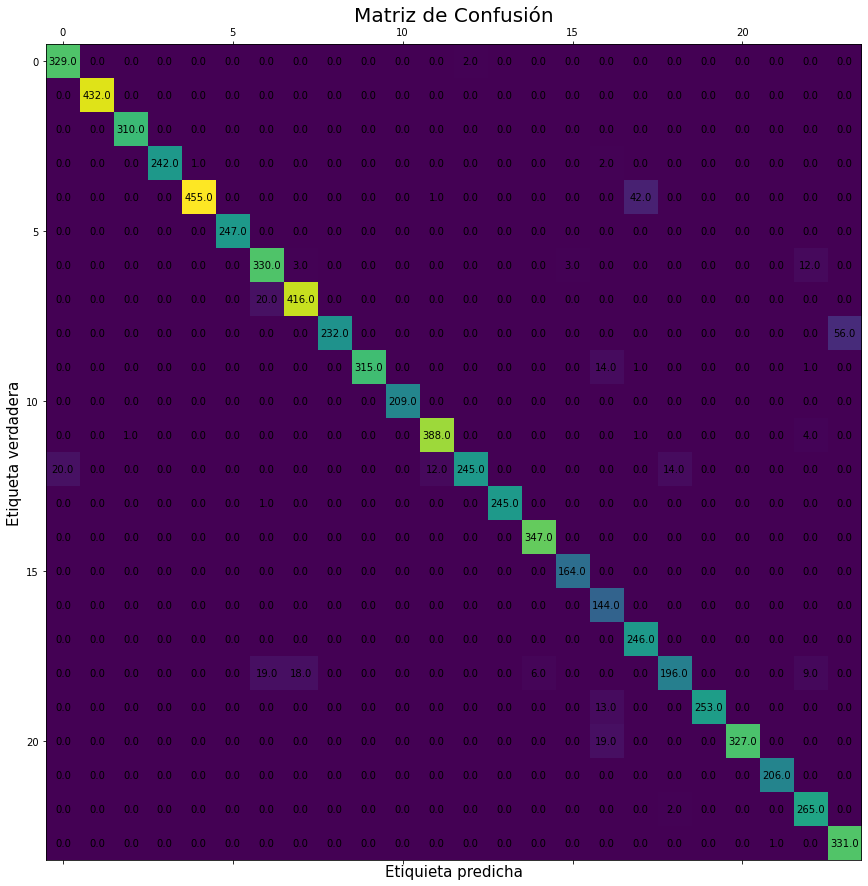

In [ ]:
from numpy import argmax
predictions= model.predict(X_test)
y_pred=[]
for i in range(len(predictions)):
    y_pred.append(argmax(predictions[i]))

y_ref= np.argmax(Y_test, axis= 1)
print('Matriz de confusion:')
cm= confusion_matrix(y_ref,  y_pred)
fig, ax= plt.subplots(figsize=(15,15))
ax.matshow(cm)
plt.title('Matriz de Confusión', fontsize= 20)
plt.ylabel('Etiqueta verdadera', fontsize = 15)
plt.xlabel('Etiquieta predicha', fontsize= 15)
for(i,j), z in np.ndenumerate(cm):
  ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

## Transfer Learning

In [20]:
im_shape = (224,224)

TRAINING_DIR = '/content/drive/MyDrive/Colab Notebooks/Procesamiento_y_Clasificacion_de_Datos/Tarea_6/hand_sing_dataset/Train'
TEST_DIR = '/content/drive/MyDrive/Colab Notebooks/Procesamiento_y_Clasificacion_de_Datos/Tarea_6/hand_sing_dataset/Test'

seed = 10

BATCH_SIZE = 16

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [22]:
data_generator = ImageDataGenerator(
        validation_split=0.2,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        preprocessing_function=preprocess_input,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
val_data_generator = ImageDataGenerator(preprocessing_function=preprocess_input,validation_split=0.2)

In [23]:
# Generator para parte train
train_generator = data_generator.flow_from_directory(TRAINING_DIR, target_size=im_shape, shuffle=True, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="training")
# Generator para parte validação
validation_generator = val_data_generator.flow_from_directory(TRAINING_DIR, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="validation")

# Generator para dataset de teste
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = test_generator.flow_from_directory(TEST_DIR, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE)

nb_train_samples = train_generator.samples
nb_validation_samples = validation_generator.samples
nb_test_samples = test_generator.samples
classes = list(train_generator.class_indices.keys())
print('Classes: '+str(classes))
num_classes  = len(classes)

Found 15305 images belonging to 24 classes.
Found 3818 images belonging to 24 classes.
Found 7172 images belonging to 24 classes.
Classes: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']


### Inception V3

In [36]:
# from keras.applications import inception_v3
from keras.applications.inception_v3 import InceptionV3,preprocess_input
from tensorflow.keras.layers import Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

inception_model = InceptionV3(weights='imagenet',include_top=False, input_shape=(224, 224, 3))

for layer in inception_model.layers:
  layer.trainable = False
# Make sure you have frozen the correct layers
for i, layer in enumerate(inception_model.layers):
  print(i, layer.name, layer.trainable)

0 input_3 False
1 conv2d_94 False
2 batch_normalization_94 False
3 activation_94 False
4 conv2d_95 False
5 batch_normalization_95 False
6 activation_95 False
7 conv2d_96 False
8 batch_normalization_96 False
9 activation_96 False
10 max_pooling2d_4 False
11 conv2d_97 False
12 batch_normalization_97 False
13 activation_97 False
14 conv2d_98 False
15 batch_normalization_98 False
16 activation_98 False
17 max_pooling2d_5 False
18 conv2d_102 False
19 batch_normalization_102 False
20 activation_102 False
21 conv2d_100 False
22 conv2d_103 False
23 batch_normalization_100 False
24 batch_normalization_103 False
25 activation_100 False
26 activation_103 False
27 average_pooling2d_9 False
28 conv2d_99 False
29 conv2d_101 False
30 conv2d_104 False
31 conv2d_105 False
32 batch_normalization_99 False
33 batch_normalization_101 False
34 batch_normalization_104 False
35 batch_normalization_105 False
36 activation_99 False
37 activation_101 False
38 activation_104 False
39 activation_105 False
40 mixed

In [37]:
x = inception_model.output
x = Flatten()(x) # Flatten dimensions to for use in FC layers
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x) # Dropout layer to reduce overfitting
x = Dense(256, activation='relu')(x)
x = Dense(24, activation='softmax')(x) # Softmax for multiclass
transfer_model2 = Model(inputs=inception_model.input, outputs=x)

In [38]:
learning_rate= 5e-5
transfer_model2.compile(loss="categorical_crossentropy", optimizer=Adam(lr=learning_rate), metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [39]:
history = transfer_model2.fit(train_generator, batch_size = 1, epochs=5, validation_data=validation_generator)

Epoch 1/5
957/957 [==============================] - 2333s 2s/step - loss: 2.1980 - accuracy: 0.3132 - val_loss: 0.7193 - val_accuracy: 0.7645
Epoch 2/5
957/957 [==============================] - 2267s 2s/step - loss: 1.5257 - accuracy: 0.4901 - val_loss: 0.4924 - val_accuracy: 0.8271
Epoch 3/5
957/957 [==============================] - 2378s 2s/step - loss: 1.3174 - accuracy: 0.5451 - val_loss: 0.3534 - val_accuracy: 0.8829
Epoch 4/5
957/957 [==============================] - 2322s 2s/step - loss: 1.2062 - accuracy: 0.5805 - val_loss: 0.3484 - val_accuracy: 0.8617
Epoch 5/5
957/957 [==============================] - 2321s 2s/step - loss: 1.1258 - accuracy: 0.6075 - val_loss: 0.2697 - val_accuracy: 0.9091


In [40]:
import pandas as pd

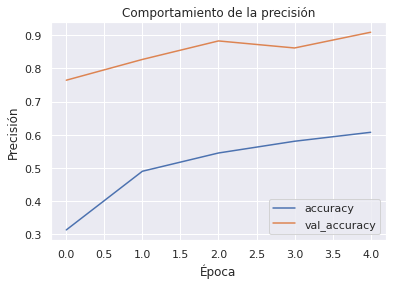

In [61]:
sns.set(rc = {'figure.figsize':(6,4)})
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.title("Comportamiento de la precisión")
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.show()

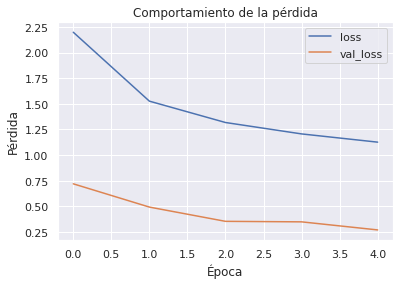

In [64]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.title("Loss")
plt.title("Comportamiento de la pérdida")
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.show()

In [44]:
prediction = transfer_model2.predict(validation_generator)

In [65]:
transfer_model2.save('/content/drive/MyDrive/Colab Notebooks/Procesamiento_y_Clasificacion_de_Datos/Tarea_6/hand_inception')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Procesamiento_y_Clasificacion_de_Datos/Tarea_6/hand_inception/assets


In [45]:
output = np.argmax(prediction, axis=1)
labels = validation_generator.class_indices
print(labels)
print(type(labels))
pred_labels = dict((v,k) for k,v in labels.items())
print(pred_labels)
print(type(pred_labels))

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'K': 9, 'L': 10, 'M': 11, 'N': 12, 'O': 13, 'P': 14, 'Q': 15, 'R': 16, 'S': 17, 'T': 18, 'U': 19, 'V': 20, 'W': 21, 'X': 22, 'Y': 23}
<class 'dict'>
{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'K', 10: 'L', 11: 'M', 12: 'N', 13: 'O', 14: 'P', 15: 'Q', 16: 'R', 17: 'S', 18: 'T', 19: 'U', 20: 'V', 21: 'W', 22: 'X', 23: 'Y'}
<class 'dict'>


In [46]:
labeled_pred = []
for i in range(0, len(output)):
    labeled_pred.append(pred_labels[output[i]])

In [48]:
labeled_test = []
for i in range(0, len(output)):
    labeled_test.append(pred_labels[validation_generator.classes[i]])

In [49]:
print(classification_report(labeled_test, labeled_pred))
cf_matrix=confusion_matrix(labeled_test, labeled_pred)

              precision    recall  f1-score   support

           A       0.91      0.98      0.94       225
           B       1.00      0.98      0.99       202
           C       0.96      0.97      0.96       228
           D       0.94      0.79      0.86       239
           E       0.93      0.75      0.83       191
           F       0.98      1.00      0.99       240
           G       0.79      0.98      0.87       218
           H       0.97      0.71      0.82       202
           I       0.91      1.00      0.95       232
           K       0.87      0.82      0.85       222
           L       0.96      1.00      0.98       248
           M       0.70      0.86      0.77       211
           N       0.93      0.72      0.81       232
           O       0.98      0.96      0.97       239
           P       1.00      0.96      0.98       217
           Q       0.97      1.00      0.98       255
           R       0.76      0.92      0.83       217

    accuracy              

In [50]:
import seaborn as sns

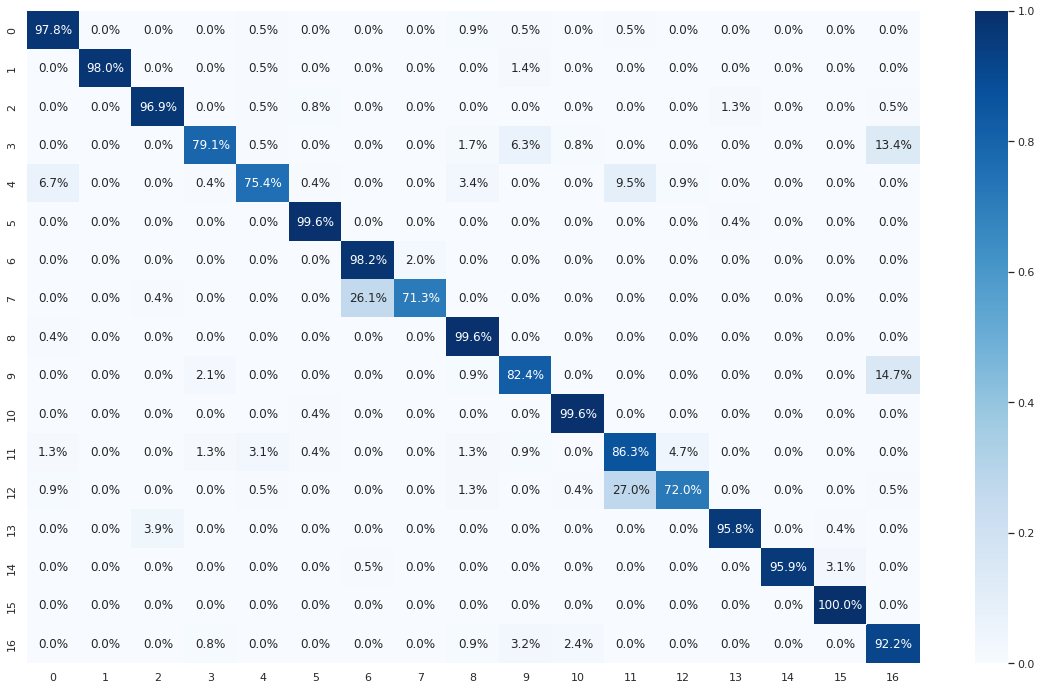

In [54]:
sns.set(rc = {'figure.figsize':(20,12)})
sns.heatmap(cf_matrix/np.sum(cf_matrix,axis=1), annot=True, fmt='.1%', cmap='Blues')

### VGG16

In [28]:
from keras.applications.vgg16 import VGG16,preprocess_input

In [29]:
vgg_model = VGG16(weights='imagenet',include_top=False, input_shape=(224, 224, 3))

for layer in vgg_model.layers:
  layer.trainable = False
# Make sure you have frozen the correct layers
for i, layer in enumerate(vgg_model.layers):
  print(i, layer.name, layer.trainable)

58900480/58889256 [==============================] - 0s 0us/step
0 input_2 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 False
16 block5_conv2 False
17 block5_conv3 False
18 block5_pool False


In [33]:
x = vgg_model.output
x = Flatten()(x) # Flatten dimensions to for use in FC layers
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x) # Dropout layer to reduce overfitting
x = Dense(256, activation='relu')(x)
x = Dense(24, activation='softmax')(x) # Softmax for multiclass
transfer_model = Model(inputs=vgg_model.input, outputs=x)

In [34]:
learning_rate= 5e-5
transfer_model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=learning_rate), metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [35]:
history = transfer_model.fit(train_generator, batch_size = 1, epochs=5, validation_data=validation_generator)

Epoch 1/5
 12/957 [..............................] - ETA: 2:17:39 - loss: 3.3812 - accuracy: 0.0469

KeyboardInterrupt: ignored